In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Notebook-Extensions" data-toc-modified-id="Notebook-Extensions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Extensions</a></span></li><li><span><a href="#Custom-CSS-for-the-notebook" data-toc-modified-id="Custom-CSS-for-the-notebook-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Custom CSS for the notebook</a></span></li><li><span><a href="#Creating-high-quality-inline-figures" data-toc-modified-id="Creating-high-quality-inline-figures-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating high quality inline figures</a></span></li><li><span><a href="#Styling-Matplotlib-figures" data-toc-modified-id="Styling-Matplotlib-figures-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Styling Matplotlib figures</a></span></li><li><span><a href="#Styling-how-Pandas-print-cells" data-toc-modified-id="Styling-how-Pandas-print-cells-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Styling how Pandas print cells</a></span></li><li><span><a href="#Auto-reload-files" data-toc-modified-id="Auto-reload-files-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Auto reload files</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
In this notebook I will go through how I have set up the styling and extensions for my Jupyter Notebooks. It should generally improve readability and quality-of-life for the Notebook user. The notebooks will describe the contents of the following files:
1. A `nbextension.config` file that includes the Notebook Extensions I use.
1. A `ipython_config.py` file located in `~/.ipython/profile_default/`. This files sets the defaults for how figures are shown in the notebook.
1. A `custom.css` file located in `~/.jupyter/custom/custom.css`. This file includes the CSS used to render the notebook.
1. A `my_mpl_style.mplstyle` file located in `~/.connfig/matplotlib/stylelib/`  that changed the default parameters for matplotlib.pyplot.

Together these file form my customization of my Jupyter notebooks.

# Notebook Extensions
I use the following extensions
1. **ExecuteTime** -- This puts the runtime as well as a timestamp at the end of every cell that has been executed.
1. **autoreload** -- Allows me to have some module automatically reload. Handy when you can to keep some of your function outside the notebook, but still have the convenience of quick editing.
1. **Hinterland** -- Enable code autocompletion menu for every keypress in a code cell, instead of only enabling it with tab.
1. **Highlight selected word** -- As the name suggests it highlights all occurrences of the selected word.
1. **Table of content** -- This allows me include a table of content in the notebook.

I use virtual environments extensively, and I don't want to have to enable these notebook extensions manually each time I start a new project. Can I include these in a config file and simply load that? Luckily the answer is yes.

For example, if we want to install ExecuteTime, we can write.
```bash
jupyter nbextension enable execute_time/ExecuteTime
```

I keep all my preferred notebook extension in `nbextension.config` file and then I use a bash script to enable the extensions.

# Custom CSS for the notebook
I love Jupyter Notebook, but there are some things about the default styling of the cells that I don't like, e.g. the figures are left-centered and the text fields are too wide. So I was quite happy to learn that Jupyter will use the following file if it exists: `~/.jupyter/custom/custom.css`.

    % The cell was generated using: "%load /Users/hartmann/.jupyter/custom/custom.css" 
```css
@import url("https://fonts.googleapis.com/css?family=Muli");

body {
  font-family: "Muli", sans-serif;
}

img {
  display: block;
  margin: auto;
}

div.output_area .rendered_html img {
  margin-left: auto;
  margin-right: auto;
}

h1 {
  text-align: left;
}

h2 {
  text-align: left;
}

h3 {
  text-align: left;
}

canvas {
  display: block;
  margin: auto;
}

.container {
  width: 50% !important;
  min-width: 750px;
}

div.cell.selected {
  border-left-width: 1px !important;
}

div.text_cell_render {
  width: 70%;
  text-align: justify;
  margin: 0 auto;
}

div.output_scroll {
  resize: vertical !important;
}

/* Remove the toolbar that result from using  matplotlib notebook magic*/
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
```

# Creating high quality inline figures

I often save figures by drag-and-drop rather than running `fig.savefig()`. However, if you do that you will not get the benefits of the 

One can change the default setting for iPython. Running `ipython profile create` one can creates the file `~/.ipython/profile_default/ipython_config.py` that contains all the configs, see [this](https://gist.github.com/minrk/3301035). By adding `c.InlineBackend.figure_format = 'retina'` to the file, the resolution of the inline figures is improved greatly. This also means that the figures will have the same resolution if you save them by dragging.


# Styling Matplotlib figures
Below I define a function that creates a figure and returns the figure object so I can save the figure. I want to be able to compare the figures as I change the styling.

In [2]:
n_curves = 4
random_data = np.random.rand(100,n_curves)
sorted_data = [sorted(random_data[:,i]) for i in range(n_curves)]
def create_figure(sorted_data, fig_name):
    fig, ax = plt.subplots()
    for y in sorted_data: 
        ax.plot(y, label='label');
    ax.set_title("Title")
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.legend()
    fig.tight_layout()
    fig.savefig(fig_name)
    return fig

First I create the plain figure using the default styling that comes with MatplotLib.

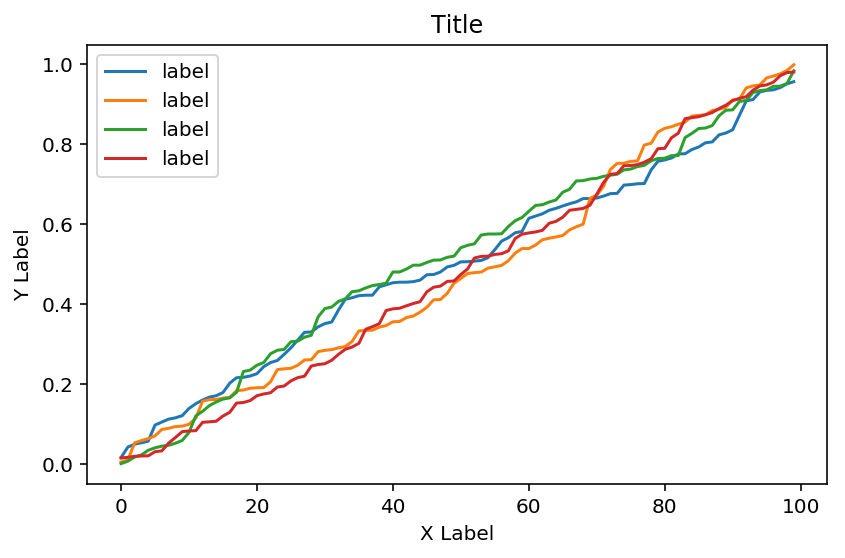

In [3]:
fig = create_figure(sorted_data, 'plain')

We want out figures to have a print quality, so we will set the figure format to retina. This should make the figure look a lot sharper.

We can alter the default parameters used by matplotlib by changing the values in the `plt.rcParams` dictionary.

Lets have a look at the five first keys in the dictionary:

In [4]:
[key for key in plt.rcParams.keys()][:5]

['_internal.classic_mode',
 'agg.path.chunksize',
 'animation.avconv_args',
 'animation.avconv_path',
 'animation.bitrate']

Below I will change some of the styling:

In [5]:
# %load matplotlib_config.py
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = False

Lets plot the figure again now that the defaults have ben changed.

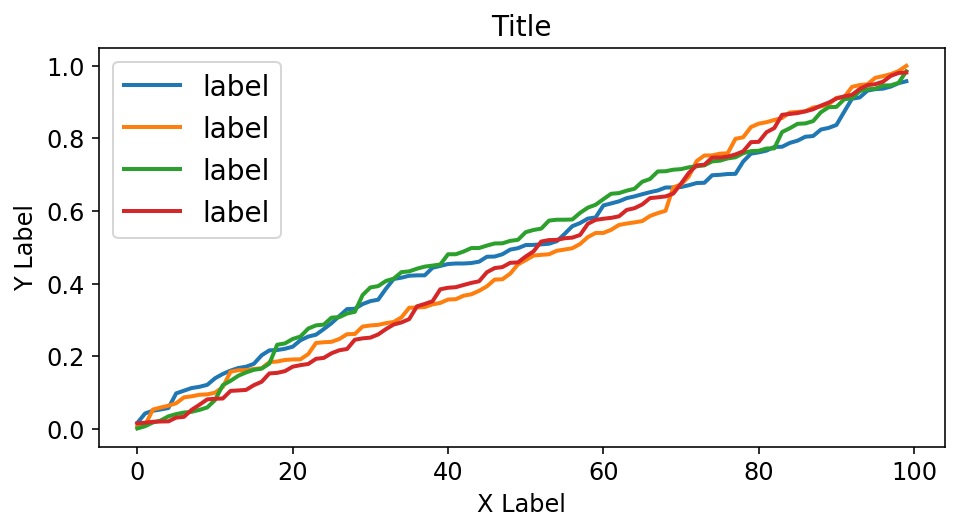

In [6]:
fig = create_figure(sorted_data, 'new_default_parameters')

Instead of including all the code above in every notebook one can write a style sheets as explained [here](https://matplotlib.org/users/style_sheets.html). I keep my own custom style sheet as a Python Module on GitHub so I can install it using `pip`. However, the direct manipulation shown above is extremely useful when developing your custom styling.

Lets see an example of a plot that uses the custom style defined in `my_mpl_style.mplstyle`. It should be placed in `~/.connfig/matplotlib/stylelib/`.

In [7]:
plt.style.use('my_mpl_style.mplstyle')

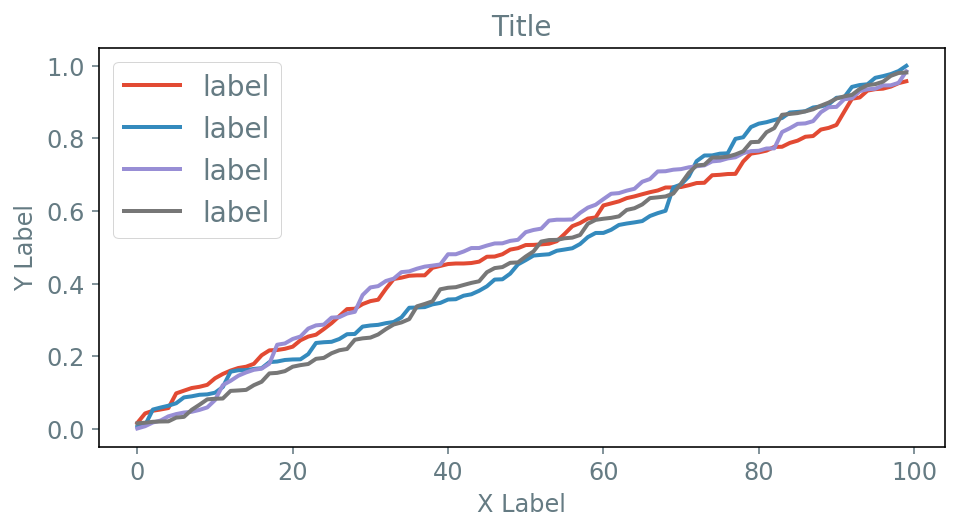

In [8]:
fig = create_figure(sorted_data, 'using_mpl_style')

# Styling how Pandas print cells

In [9]:
df = pd.DataFrame(np.random.rand(100,10))

In [10]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.332559,0.817335,0.408790,0.883417,0.925760,0.491475,0.332996,0.245097,0.955079,0.683596
1,0.506777,0.326121,0.581329,0.967265,0.774262,0.035652,0.392939,0.497094,0.488386,0.172741
2,0.124318,0.845284,0.973494,0.552595,0.225346,0.948348,0.177595,0.222497,0.690050,0.847546
3,0.594137,0.764081,0.992046,0.190661,0.458834,0.619343,0.543222,0.478462,0.941433,0.189839
4,0.389404,0.707036,0.410187,0.473415,0.152940,0.225006,0.459529,0.886686,0.774106,0.256574
5,0.752569,0.437070,0.515809,0.852868,0.496751,0.694558,0.446531,0.595130,0.441311,0.057544
6,0.743398,0.742810,0.336510,0.021672,0.154411,0.571875,0.679285,0.013389,0.267114,0.947542
7,0.249761,0.064544,0.607377,0.427276,0.370251,0.865870,0.951798,0.980376,0.503680,0.867869
8,0.929170,0.407956,0.641100,0.808600,0.679924,0.952972,0.765462,0.035881,0.499213,0.365271
9,0.069586,0.394798,0.560635,0.941417,0.297765,0.187606,0.506170,0.955814,0.891632,0.419866


In [11]:
pd.set_option("max_colwidth", 100)
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 9001)


In [12]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.332559,0.817335,0.408790,0.883417,0.925760,0.491475,0.332996,0.245097,0.955079,0.683596
1,0.506777,0.326121,0.581329,0.967265,0.774262,0.035652,0.392939,0.497094,0.488386,0.172741
2,0.124318,0.845284,0.973494,0.552595,0.225346,0.948348,0.177595,0.222497,0.690050,0.847546
3,0.594137,0.764081,0.992046,0.190661,0.458834,0.619343,0.543222,0.478462,0.941433,0.189839
4,0.389404,0.707036,0.410187,0.473415,0.152940,0.225006,0.459529,0.886686,0.774106,0.256574
5,0.752569,0.437070,0.515809,0.852868,0.496751,0.694558,0.446531,0.595130,0.441311,0.057544
6,0.743398,0.742810,0.336510,0.021672,0.154411,0.571875,0.679285,0.013389,0.267114,0.947542
7,0.249761,0.064544,0.607377,0.427276,0.370251,0.865870,0.951798,0.980376,0.503680,0.867869
8,0.929170,0.407956,0.641100,0.808600,0.679924,0.952972,0.765462,0.035881,0.499213,0.365271
9,0.069586,0.394798,0.560635,0.941417,0.297765,0.187606,0.506170,0.955814,0.891632,0.419866


# Auto reload files
Often I will be developing a python module while I'm writing the notebook. I will typically put functions for plotting or some pre-processing inside such a file. But this means that if I want to change I will have to manually reload the file. However, using the `autoreload` Notebook extension, I no longer have to worry about that

In [13]:
%load_ext autoreload
%autoreload 2
%aimport someModule

In [14]:
someModule.some_function()

Some function has run. And now the result is different!


In [15]:
# I should write a script that changes the file 
# here, so I dont have to do it behind the scene.

I then change the file and run it again below:

In [16]:
someModule.some_function()

Some function has run. And now the result is different!


# References
1. [Gerrit Gruben - Leveling up your Jupyter notebook skills](https://www.youtube.com/watch?v=b8g-8T0amuk&t=335s)